<a href="https://colab.research.google.com/github/veyselalevcan/Time_Series/blob/main/tsa_arima_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')


############################
# Veri Seti
############################

# Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.
# Period of Record: March 1958 - December 2001

In [ ]:
data = sm.datasets.co2.load_pandas()
y = data.data
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [ ]:
y = y['co2'].resample('MS').mean()

In [ ]:
y = y.fillna(y.bfill())

In [ ]:
train = y[:'1997-12-01']
test = y['1998-01-01':]

##################################################
# ARIMA(p, d, q): (Autoregressive Integrated Moving Average)
##################################################


In [ ]:
model = sm.tsa.arima.ARIMA(train, order=(1, 1, 1))
arima_model = model.fit()

arima_model.summary() #AIC BIc HQIC degerlerinin dusuk olmasını hedefle


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.768
Date:                Tue, 27 Feb 2024   AIC                           1157.537
Time:                        11:07:27   BIC                           1170.039
Sample:                    03-01-1958   HQIC                          1162.452
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5669      0.054     10.586      0.000       0.462       0.672
ma.L1          0.3284      0.062      5.306      0.000       0.207       0.450
sigma2         0.6534      0.050     12.965      0.000       0.555       0.752
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.13   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_pred = arima_model.get_forecast(steps=48).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

In [ ]:
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()



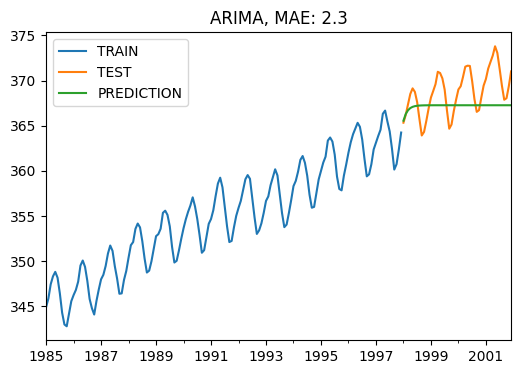

In [ ]:
plot_co2(train, test, y_pred, "ARIMA")

############################
# Hyperparameter Optimization (Model Derecelerini Belirleme)
############################

############################
# AIC & BIC İstatistiklerine Göre Model Derecesini Belirleme
############################

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

In [ ]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model = sm.tsa.ARIMA(train, order=order).fit()
            aic = arima_model.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

In [ ]:
best_params_aic = arima_optimizer_aic(train, pdq)

ARIMA(0, 0, 0) AIC=3954.01
ARIMA(0, 0, 1) AIC=3312.73
ARIMA(0, 0, 2) AIC=2771.31
ARIMA(0, 0, 3) AIC=2328.74
ARIMA(0, 1, 0) AIC=1523.91
ARIMA(0, 1, 1) AIC=1254.79
ARIMA(0, 1, 2) AIC=1137.97
ARIMA(0, 1, 3) AIC=1094.51
ARIMA(0, 2, 0) AIC=1279.81
ARIMA(0, 2, 1) AIC=1257.89
ARIMA(0, 2, 2) AIC=1247.74
ARIMA(0, 2, 3) AIC=1141.50
ARIMA(0, 3, 0) AIC=1482.91
ARIMA(0, 3, 1) AIC=1286.29
ARIMA(0, 3, 2) AIC=1264.05
ARIMA(0, 3, 3) AIC=1253.48
ARIMA(1, 0, 0) AIC=1536.61
ARIMA(1, 0, 1) AIC=1267.22
ARIMA(1, 0, 2) AIC=1149.98
ARIMA(1, 0, 3) AIC=1105.72
ARIMA(1, 1, 0) AIC=1207.78
ARIMA(1, 1, 1) AIC=1157.54
ARIMA(1, 1, 2) AIC=1113.98
ARIMA(1, 1, 3) AIC=1095.90
ARIMA(1, 2, 0) AIC=1256.05
ARIMA(1, 2, 1) AIC=1257.80
ARIMA(1, 2, 2) AIC=1161.11
ARIMA(1, 2, 3) AIC=1117.55
ARIMA(1, 3, 0) AIC=1418.84
ARIMA(1, 3, 1) AIC=1262.07
ARIMA(1, 3, 2) AIC=1263.83
ARIMA(1, 3, 3) AIC=1253.50
ARIMA(2, 0, 0) AIC=1217.86
ARIMA(2, 0, 1) AIC=1168.38
ARIMA(2, 0, 2) AIC=1124.96
ARIMA(2, 0, 3) AIC=1106.92
ARIMA(2, 1, 0) AIC=1103.53
A

In [ ]:
best_params_aic

(2, 1, 3)

############################
# Final Model
############################


In [ ]:
# Fit the final ARIMA model using the best hyperparameters selected by AIC
arima_model = sm.tsa.ARIMA(train, order=best_params_aic).fit()

# Make predictions for the test set
y_pred = arima_model.forecast(steps=len(test))

# Convert predictions to a pandas Series with the correct index
y_pred = pd.Series(y_pred, index=test.index) # Yazdıgımız fonksiyona uygun hale getirmek icin seriye cevirdik.


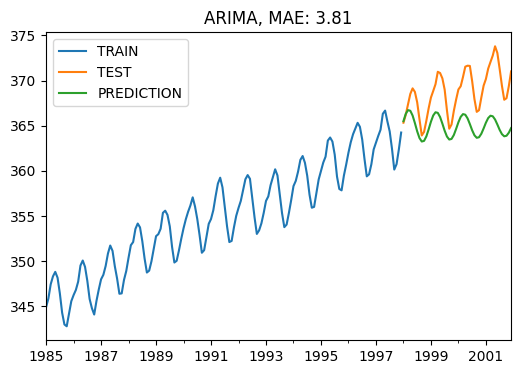

In [ ]:
plot_co2(train, test, y_pred, "ARIMA")

##################################################
# SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)
##################################################

In [ ]:
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))

sarima_model = model.fit(disp=0) # cıktı kalabalıgını azalttık disp ile

In [ ]:
y_pred_test = sarima_model.get_forecast(steps=48)

y_pred = y_pred_test.predicted_mean

y_pred = pd.Series(y_pred, index=test.index)

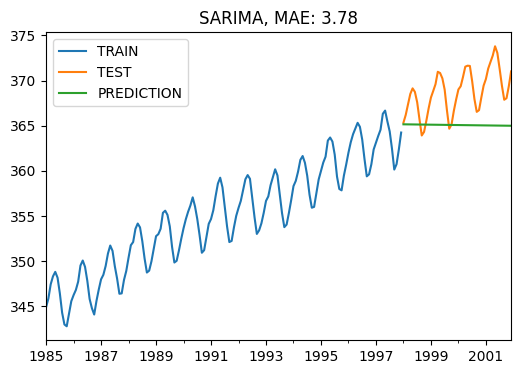

In [ ]:
plot_co2(train, test, y_pred, "SARIMA")

############################
# Hyperparameter Optimization (Model Derecelerini Belirleme)
############################

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [ ]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6922.606550808509
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6318.3052196789895
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1643.9996657880379
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1428.2938925354324
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1820.7236583825966
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1702.2973035880764
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1205.025400971046
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:973.2077276483346
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6269.1903647451345
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5663.567930042037
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1229.8447515746066
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1126.5843176762182
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1475.204332725657
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1008.1602684950085
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:767.6332924043652
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1523.9134546907358
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1154.743619904

############################
# Final Model
############################

In [ ]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

In [ ]:
y_pred_test = sarima_final_model.get_forecast(steps=48)

y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

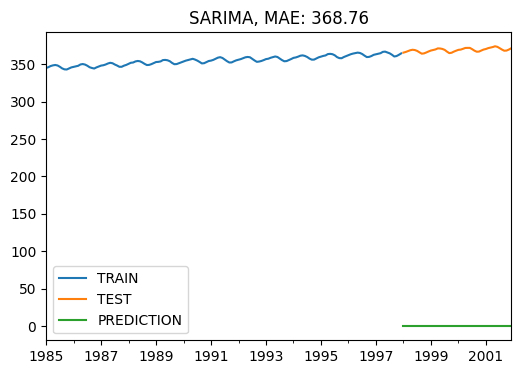

In [ ]:
plot_co2(train, test, y_pred, "SARIMA")

##################################################
# MAE'ye Göre SARIMA Optimizasyonu
##################################################

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=48)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [ ]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:368.7634375
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:324.1790915674037
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:5.063020833333329
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:4.803324373445775
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:5.073953469325261
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:4.948440998374186
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:3.3237251359415474
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:1.5279699618019482
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:364.9178691427644
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:320.4050600356536
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:4.985339500537425
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:4.76530515125738
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:4.911204561675394
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:368.7634375
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:3.674145484917735
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:1.5666871609630053
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:4.526979166666664
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:3.9315401446376206
S

In [ ]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

In [ ]:
y_pred_test = sarima_final_model.get_forecast(steps=48)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

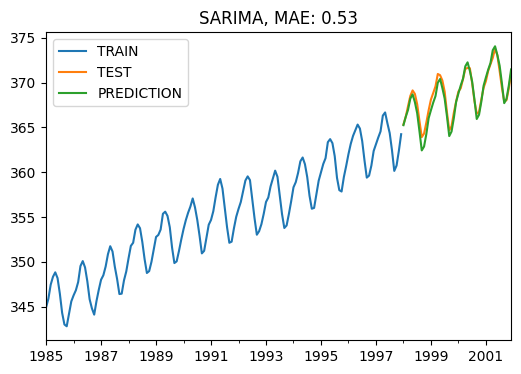

In [ ]:
plot_co2(train, test, y_pred, "SARIMA")

############################
# Final Model Tum veri ile model kurma
############################

In [ ]:
model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

In [ ]:
feature_predict = sarima_final_model.get_forecast(steps=6) #6 aylık tahmin
feature_predict = feature_predict.predicted_mean
feature_predict

2002-01-01    371.930530
2002-02-01    372.718072
2002-03-01    373.585289
2002-04-01    374.494056
2002-05-01    375.101888
2002-06-01    374.687872
Freq: MS, Name: predicted_mean, dtype: float64